### In this notebook, we try to decompose an image into its 4 level 1 wavelet bands, and then reconstruct them using the Haar DWT

For simplicity, we first start wit ha grayscal image, and then move on to RGB image

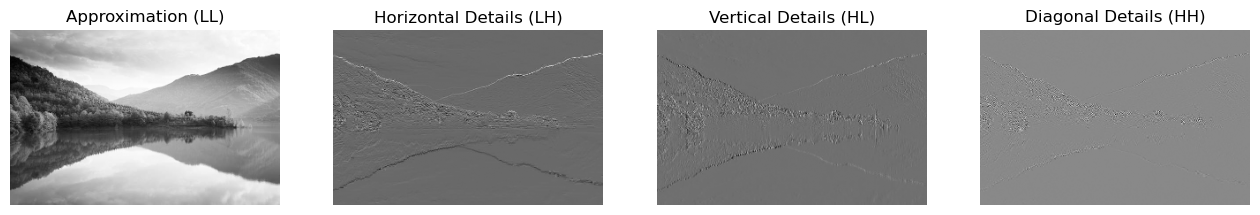

In [8]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("trial.jpg", cv2.IMREAD_GRAYSCALE)

coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2

# Let us now show each of the components
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(LL, cmap="gray")
axes[0].set_title("Approximation (LL)")

axes[1].imshow(LH, cmap="gray")
axes[1].set_title("Horizontal Details (LH)")

axes[2].imshow(HL, cmap="gray")
axes[2].set_title("Vertical Details (HL)")

axes[3].imshow(HH, cmap="gray")
axes[3].set_title("Diagonal Details (HH)")

for ax in axes:
    ax.axis("off")

plt.show()

Let us now try to combine these and see

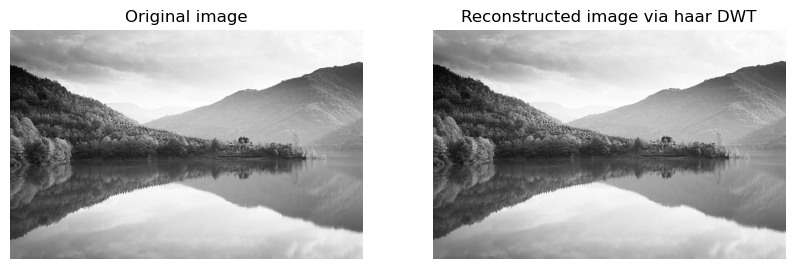

In [10]:
reconstructed_img = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].imshow(image, cmap = 'gray')
axes[0].set_title("Original image")
axes[0].axis("off")

axes[1].imshow(reconstructed_img, cmap = 'gray')
axes[1].set_title("Reconstructed image via haar DWT")
axes[1].axis("off")

plt.show()

#### Same image, but coloured

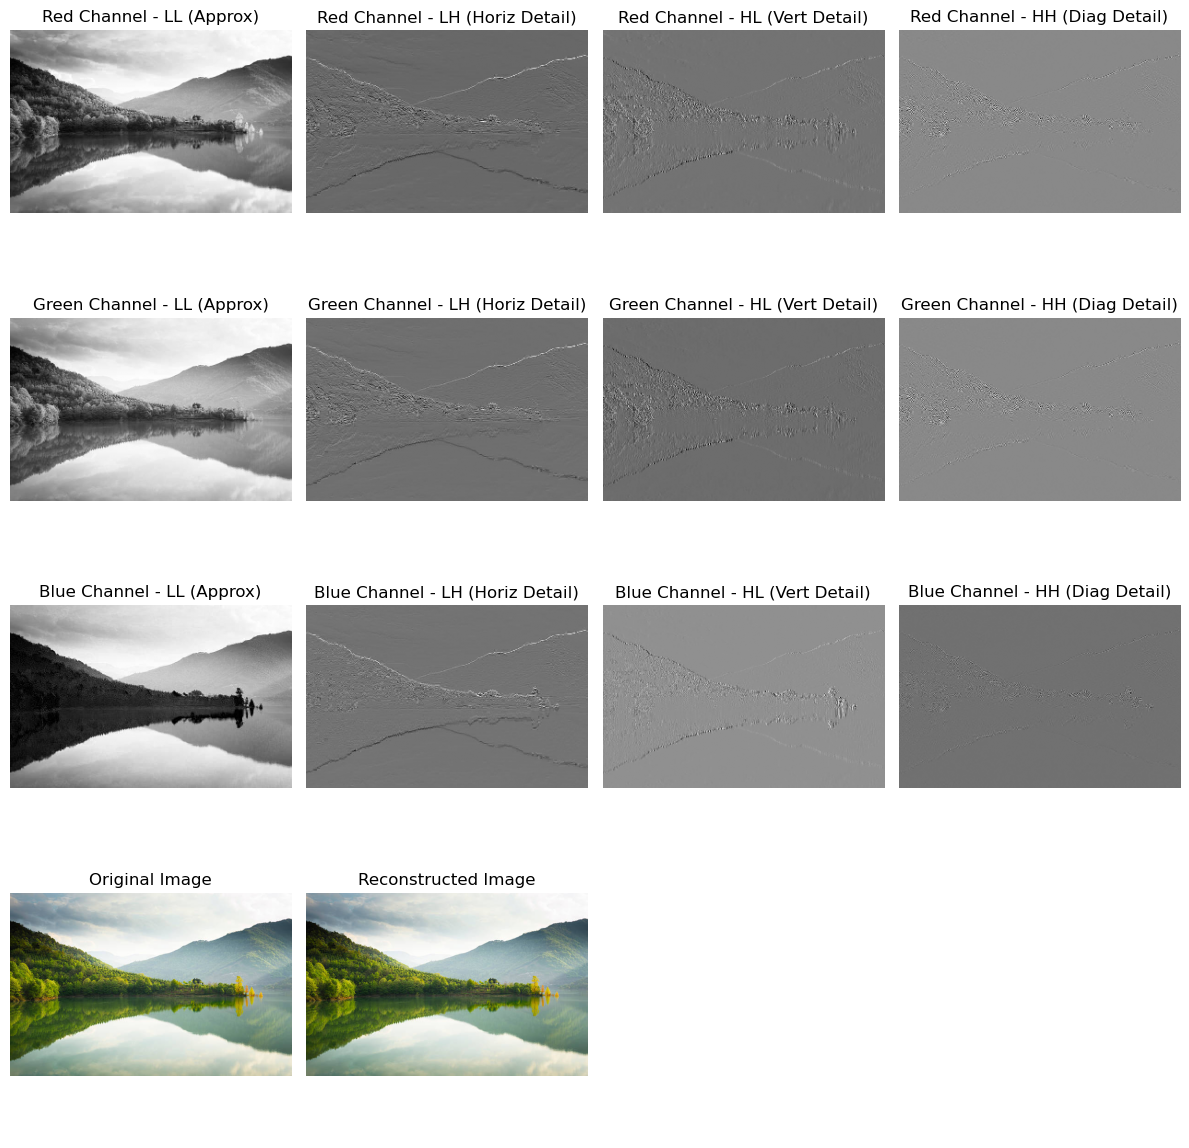

In [ ]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

image_bgr = cv2.imread("trial.jpg")

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

def wavelet_decompose_reconstruct(channel):
    coeffs2 = pywt.dwt2(channel, 'haar')
    LL, (LH, HL, HH) = coeffs2
    reconstructed = pywt.idwt2((LL, (LH, HL, HH)), 'haar')
    return LL, LH, HL, HH, reconstructed

R, G, B = cv2.split(image_rgb)

R_LL, R_LH, R_HL, R_HH, R_reconstructed = wavelet_decompose_reconstruct(R)
G_LL, G_LH, G_HL, G_HH, G_reconstructed = wavelet_decompose_reconstruct(G)
B_LL, B_LH, B_HL, B_HH, B_reconstructed = wavelet_decompose_reconstruct(B)

# Merge the reconstructed channels back into an RGB image
reconstructed_rgb = cv2.merge([
    np.clip(R_reconstructed, 0, 255).astype(np.uint8),
    np.clip(G_reconstructed, 0, 255).astype(np.uint8),
    np.clip(B_reconstructed, 0, 255).astype(np.uint8)
])

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

titles = ["LL (Approx)", "LH (Horiz Detail)", "HL (Vert Detail)", "HH (Diag Detail)"]

channel_data = [
    (R_LL, R_LH, R_HL, R_HH, "Red Channel"),
    (G_LL, G_LH, G_HL, G_HH, "Green Channel"),
    (B_LL, B_LH, B_HL, B_HH, "Blue Channel"),
]

for i, (LL, LH, HL, HH, name) in enumerate(channel_data):
    for j, (band, title) in enumerate(zip([LL, LH, HL, HH], titles)):
        axes[i, j].imshow(band, cmap="gray")
        axes[i, j].set_title(f"{name} - {title}")
        axes[i, j].axis("off")

# Display original and reconstructed images
axes[3, 0].imshow(image_rgb)
axes[3, 0].set_title("Original Image")
axes[3, 0].axis("off")

axes[3, 1].imshow(reconstructed_rgb)
axes[3, 1].set_title("Reconstructed Image")
axes[3, 1].axis("off")

for j in range(2, 4):
    axes[3, j].axis("off")

plt.tight_layout()
plt.show()
